In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.1.0'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

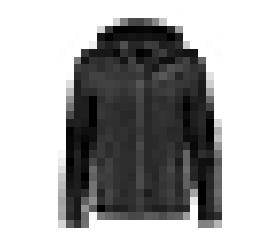

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]  # [4]

'Coat'

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

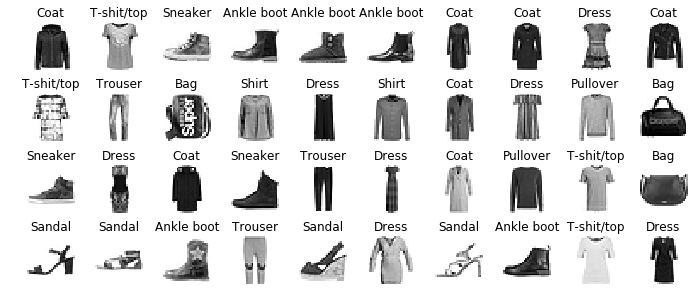

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  # ==> 784
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
keras.backend.clear_session()

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# ! conda install graphviz -y
# ! conda install pydot -y
# ! conda install python-graphviz -y

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [28]:
hidden1 = model.layers[1]

In [29]:
hidden1.name

'dense'

In [30]:
weights, biases = hidden1.get_weights()

In [31]:
weights

array([[-0.06876177,  0.0188361 ,  0.05291867, ..., -0.07439312,
        -0.06049028,  0.02240082],
       [-0.06289604,  0.00903568, -0.0402863 , ...,  0.04808336,
         0.05798677, -0.0232274 ],
       [ 0.05396402,  0.02691937, -0.03264607, ..., -0.04356765,
         0.04138016, -0.01220334],
       ...,
       [-0.04644103,  0.02729893,  0.00335829, ..., -0.06017453,
        -0.01840444, -0.03262852],
       [-0.0110819 , -0.02406356,  0.04916593, ..., -0.01500044,
         0.04636535, -0.05866641],
       [-0.05183817,  0.06146999,  0.02757014, ..., -0.00453172,
        -0.02657526,  0.06375279]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [36]:
%%time
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# Epoch 30/30
# 55000/55000 [==============================] - 7s 135us/sample - loss: 0.2283 - accuracy: 0.9178 - val_loss: 0.2856 - val_accuracy: 0.8966
# Wall time: 3min 35s

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.7245 - accuracy: 0.7619 - val_loss: 0.5094 - val_accuracy: 0.8316
Epoch 2/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4886 - accuracy: 0.8308 - val_loss: 0.4641 - val_accuracy: 0.8422
Epoch 3/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4449 - accuracy: 0.8444 - val_loss: 0.4367 - val_accuracy: 0.8508
Epoch 4/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4164 - accuracy: 0.8538 - val_loss: 0.4117 - val_accuracy: 0.8590
Epoch 5/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3965 - accuracy: 0.8607 - val_loss: 0.3813 - val_accuracy: 0.8674
Epoch 6/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3809 - accuracy: 0.8659 - val_loss: 0.3746 - val_accuracy: 0.8708
Epoch 7/30
55000/55000 [==============================] -

In [37]:
hist.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [38]:
print(hist.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

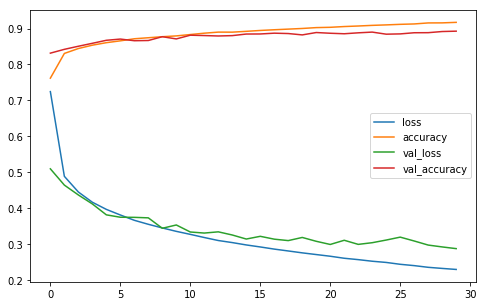

In [40]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

In [41]:
model.evaluate(X_test, y_test)
# [0.32513083802461623, 0.8841], [loss, accuracy]

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3255 - accuracy: 0.8819


[0.3254522364974022, 0.8819]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#        [0   , 1  ,  2  ,  3  ,  4  ,  5  ,  6  ,  7,    8  ,  9]
# array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
#        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
#        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
#       dtype=float32)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [44]:
np.array

<function numpy.array>

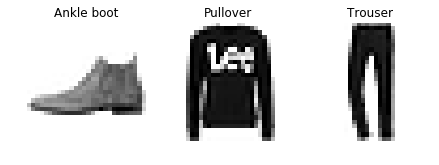

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image,cmap='binary', interpolation='nearest')
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from sk